In [ ]:
from Algorithm1 import recursive_qr_factorization
from Algorithm2 import block_cholesky_lu_qr_factorization
from Algorithm3 import recursive_qr_combined

### Numerical Results

## Plan


Compare the time taken in computing Algorithm 1 and 3

In [ ]:
import time
import numpy as np

k = 1
m = 4000
n = 500
A = np.random.rand(m,n)
time_full = []
time_mixed = []
arr_k=[]

for x in range(1,8):
    k=k*2
    arr_k.append(k)
    start = time.time()
    recursive_qr_combined(A,k)
    end = time.time()

    diff = end - start
    time_mixed.append(diff)

    start = time.time()
    recursive_qr_factorization(A)
    end = time.time()

    diff = end - start
    time_full.append(diff)





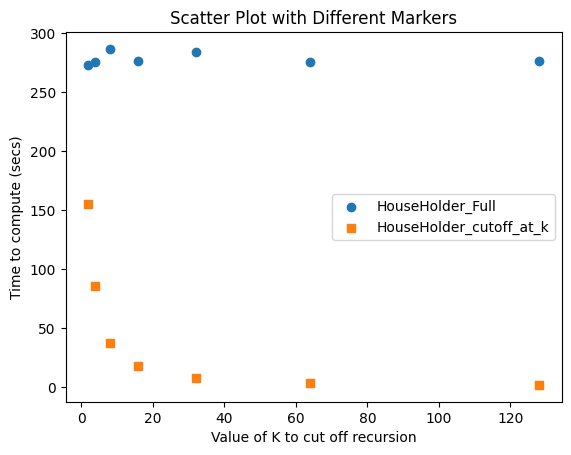

In [ ]:
import matplotlib.pyplot as plt

# Sample data


# Plot data with different markers
plt.scatter(arr_k, time_full, label='HouseHolder_Full', marker='o')  # Circle marker for series 1
plt.scatter(arr_k, time_mixed, label='HouseHolder_cutoff_at_k', marker='s')  # Square marker for series 2

# Customize plot
plt.xlabel('Value of K to cut off recursion')
plt.ylabel('Time to compute (secs)')
plt.title('Scatter Plot with Different Markers')
plt.legend()
plt.show()


**Observations**

Clearly the computational time for the full Householder recursive remains roughly same as it doesnt depend on k.
When we cut off the recursion at blocks with less than k columns(for varying values of k) , it gives a shorter run time as k increases

In [ ]:
def construct_random_matrix(n: int, m: int, cond_number: float):
    """
    Constructs random nxm matrix with a given condition matrix.

    Args:
        n, m: matrix dimensions
        cond_number: the desired condition numebr

    Returns: nxm matrix with condition number cond_number
    """
    # Ensure the condition number is positive
    cond_number = abs(cond_number)

    # Generate a random matrix
    A = np.random.randn(n, m)

    # Perform SVD
    U, s, Vt = np.linalg.svd(A, full_matrices=False)

    # Manipulate singular values to achieve the desired condition number
    s_target = np.linspace(1, cond_number, min(n, m))
    # Here forces minimum singular value to be 1, and maximum singular value to be condition number
    # In accordance with the cond_2 definition
    s_actual = np.zeros(min(n, m))
    s_actual[:len(s_target)] = s_target

    # Reconstruct the matrix with the modified singular values
    reconstructed_matrix = U @ np.diag(s_actual) @ Vt

    return reconstructed_matrix

## Plan

We want to emprically observe the relative error norm of the orthogonal matrices `Q` computed using Algorithm 2 and 3 (Using the `relative spectral norm`). We check this by varying the condtion number of the matrix `A`

In [ ]:
k = 64
m = 4000
n = 800

loss_block = []
loss_mixed = []
cond_number =[]
start = 1
for x in range(1,26):
    start = start*np.sqrt(2)
    A = construct_random_matrix(m,n,start) ## Create matrix A with a given condtion number
    V1,S1,R1 = block_cholesky_lu_qr_factorization(A)
    V2,S2,R2 = recursive_qr_combined(A,k)
    z1 = V1@S1@V2.T
    z2 = V2@S2@V2.T
    shape = z1.shape[0]
    Q1 = np.eye(shape) - z1
    Q2 = np.eye(shape) - z2

    relative_norm_block = np.linalg.norm(Q1.T@Q1 - np.eye(shape)) # Relative spectral norm error
    relative_norm_mixed = np.linalg.norm(Q2.T@Q2 - np.eye(shape))
    cond_number.append(start)
    loss_block.append(relative_norm_block)
    loss_mixed.append(relative_norm_mixed)





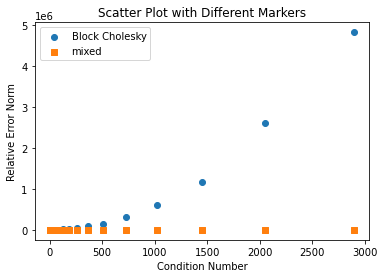

In [ ]:
plt.scatter(cond_number, loss_block, label='Block Cholesky', marker='o')
plt.scatter(cond_number, loss_mixed, label='mixed', marker='s')

# Customize plot
plt.xlabel('Condition Number')
plt.ylabel('Relative Error Norm')
plt.title('Scatter Plot with Different Markers')
plt.legend()
plt.show()

**Observations**

Given the nature of the computation of the Block Cholesky form  ie due $A^TA$, we see that the relative error of the norm will increase as the condition number gets squared, while the relative error norm of our algorithm remains roughly the same.